# Domain analysis

In [143]:
import pickle
import sys, os
sys.path.append("/Users/chilpert/Work/pyproteinsExt/src")
sys.path.append("/Users/chilpert/Work/pyproteins/src")
import pyproteinsExt 
import pyproteins
import time
import matplotlib.pyplot as plt

In [144]:
def save(data, tag=None):
    saveDir="/Volumes/arwen/mobi/group/NOX_CH/pickle_saved"
    timestr = time.strftime("%Y%m%d-%H%M%S")
    fTag = "NOX_annotation_" + tag + "_" if tag else "NOX_annotation_"
    fSerialDump = fTag + timestr + ".pickle"
    with open(saveDir + '/' + fSerialDump, 'wb') as f:
        pickle.dump(data, f)
    print('data structure saved to', saveDir + '/' + fSerialDump)

def load(fileName):
    saveDir="/Volumes/arwen/mobi/group/NOX_CH/pickle_saved"
    d = pickle.load( open(saveDir + "/" + fileName, "rb" ) )
    print("restore a annotated container of ", len(d), "elements")
    return d

##### Load full Pfam annotation

In [145]:
data10_3=load("NOX_annotation_filter_fullPfam_filteredDomains1e-3_20190517-162404.pickle")
data10_1=load("NOX_annotation_filter_fullPfam_filteredDomains1e-1_20190517-162404.pickle")
data_all=load("NOX_annotation_filter_fullPfam_allDomains_20190517-162405.pickle")

restore a annotated container of  163 elements
restore a annotated container of  163 elements
restore a annotated container of  163 elements


##### Parse data 

In [146]:
def parse_data(data): 
    '''Return dictionnary with domain as key and list of proteins that contains this domain as value'''
    dic_domain={}
    for protein in data :
        for domain in data[protein]['hmmr']:
            if domain in dic_domain:
                dic_domain[domain].append(protein)
            else:     
                dic_domain[domain]=[protein]
    return(dic_domain)       

def simplify_data(data):
    dic_protein={}
    for protein in data : 
        dic_protein[protein]=list(data[protein]['hmmr'].keys())
    return dic_protein    

def assemble_domains_with_same_proteins(dic_domain):
    dic_prot={}
    for d in dic_domain:
        dic_domain[d].sort()
        prots=",".join(dic_domain[d])
        if not prots in dic_prot: 
            dic_prot[prots]=set()
        dic_prot[prots].add(d)
    new_dic_domain={}    
    for p in dic_prot: 
        doms=",".join(dic_prot[p])
        new_dic_domain[doms]=p.split(",")
    return new_dic_domain    

In [147]:
from collections import OrderedDict

def get_dic_domain(data):
    dic_domain=parse_data(data)
    ordered_dic_domain=OrderedDict(sorted(dic_domain.items(),key=lambda kv: len(kv[1]),reverse=True))
    return ordered_dic_domain

def get_dic_protein(data):
    dic_protein=simplify_data(data)
    ordered_dic_protein=OrderedDict(sorted(dic_protein.items(),key=lambda kv: len(kv[1]),reverse=True))
    return ordered_dic_protein

#### Display graphics

In [148]:
def graph_biggest_domains(ordered_dic_domain,domains_to_keep,output_pdf,graph_title,nb_core):
    height=[len(ordered_dic_domain[d]) for d in ordered_dic_domain]
    bars=tuple(ordered_dic_domain.keys())
    height=height[:domains_to_keep][::-1]
    bars=bars[:domains_to_keep][::-1]
    plt.figure(0)
    plt.barh(bars,height)
    plt.title(graph_title)
    plt.xlabel("Number of proteins with the domain")
    plt.ylabel("Domains")
    plt.tight_layout()       
    plt.savefig(output_pdf,format="pdf")
    
    no_core_height=height[:-nb_core]
    no_core_bars=bars[:-nb_core]
    #no_core_domain_ypos=np.arange(len(no_core_domain_bars))
    plt.figure(1)
    plt.barh(no_core_bars,no_core_height)
    plt.title(graph_title+", no core domains")
    plt.xlabel("Number of proteins with the domain")
    plt.ylabel("Domains")
    plt.tight_layout()
    pdf=output_pdf.split(".")[0]+"_no_core.pdf"
    plt.savefig(pdf,format="pdf")
    
def graph_distrib_nb_domains(data,graph_title,output_pdf): 
    dic_nb_domain={}
    for p in data : 
        nb_domain=len(data[p]['hmmr'].keys())
        if nb_domain not in dic_nb_domain : 
            dic_nb_domain[nb_domain]=0
        dic_nb_domain[nb_domain]+=1 
    
    x=list(dic_nb_domain.keys())
    y=list(dic_nb_domain.values())
    plt.bar(x,y)
    plt.title(graph_title)
    plt.xlabel("Number of domains")
    plt.ylabel("Number of proteins")
    plt.savefig(output_pdf,format="pdf")
        

#### With evalue filter at 1e-3

In [158]:
ordered_dic_domain=get_dic_domain(data10_3)
ordered_dic_protein10_3=get_dic_protein(data10_3)
assemble_dic_domain10_3=assemble_domains_with_same_proteins(ordered_dic_domain)

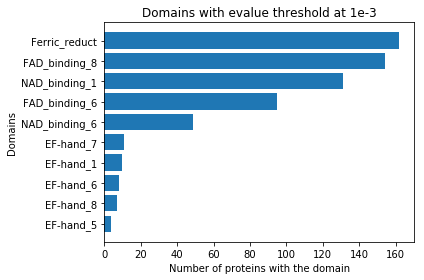

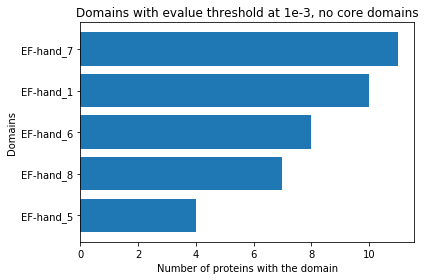

In [160]:
graph_biggest_domains(ordered_dic_domain,len(ordered_dic_domain),"/Users/chilpert/Work/NOX_visu/domains1e-3_proteins.pdf","Domains with evalue threshold at 1e-3",5)

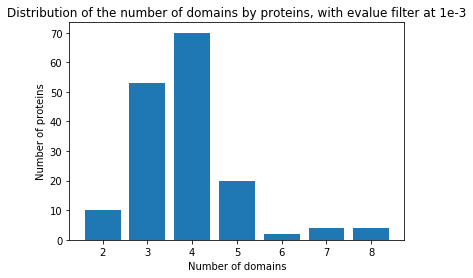

In [161]:
graph_distrib_nb_domains(data10_3,"Distribution of the number of domains by proteins, with evalue filter at 1e-3","/Users/chilpert/Work/NOX_visu/distrib_nb_domains1e-3.pdf")

#### Graphics with evalue 1e-1

In [162]:
ordered_dic_domain=get_dic_domain(data10_1)
ordered_dic_protein10_1=get_dic_protein(data10_1)
assemble_dic_domain10_1=assemble_domains_with_same_proteins(ordered_dic_domain)

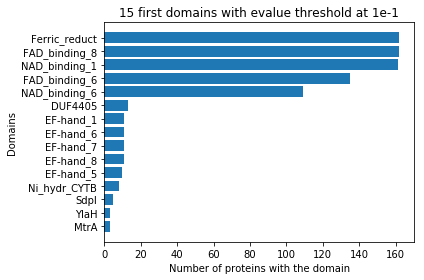

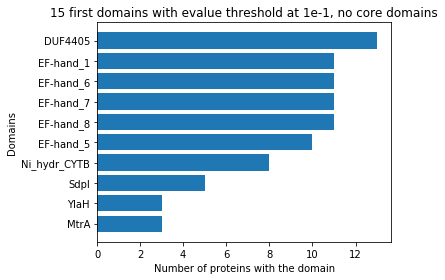

In [163]:
graph_biggest_domains(ordered_dic_domain,15,"/Users/chilpert/Work/NOX_visu/domains1e-1_proteins.pdf","15 first domains with evalue threshold at 1e-1",5)

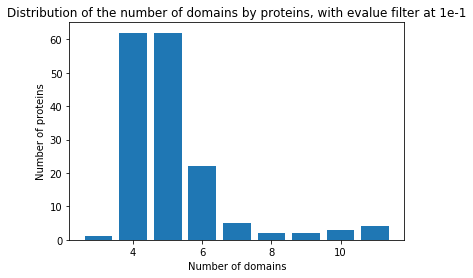

In [164]:
graph_distrib_nb_domains(data10_1,"Distribution of the number of domains by proteins, with evalue filter at 1e-1","/Users/chilpert/Work/NOX_visu/distrib_nb_domains1e-1.pdf")

#### Graphics with no evalue filter 

In [165]:
ordered_dic_domain=get_dic_domain(data_all)
ordered_dic_protein_all=get_dic_protein(data_all)
assemble_dic_domain_all=assemble_domains_with_same_proteins(ordered_dic_domain)

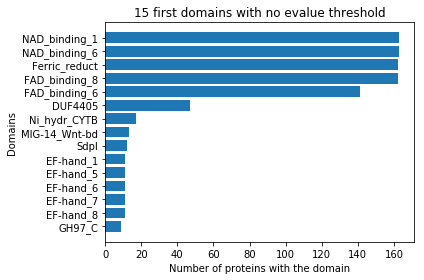

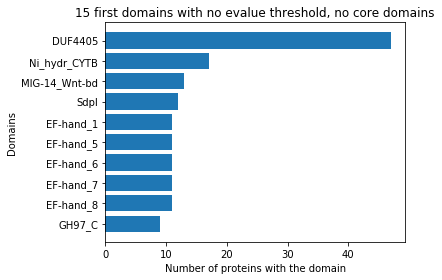

In [166]:
graph_biggest_domains(ordered_dic_domain,15,"/Users/chilpert/Work/NOX_visu/domains_all_proteins.pdf","15 first domains with no evalue threshold",5)

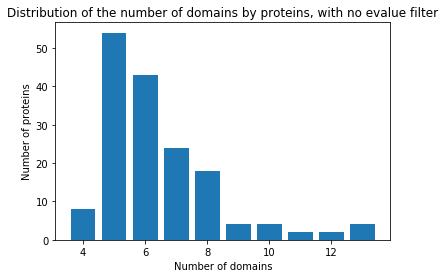

In [167]:
graph_distrib_nb_domains(data_all,"Distribution of the number of domains by proteins, with no evalue filter","/Users/chilpert/Work/NOX_visu/distrib_nb_domains_all.pdf")

### Create, browse and modify ete3 tree 

In [168]:
from ete3 import NCBITaxa
from ete3 import Tree
ncbi = NCBITaxa()

core_domain=["NAD_binding_1","FAD_binding_8","Ferric_reduct","FAD_binding_6","NAD_binding_6"]

def create_and_complete_tree(data):
    #Create tree from all taxids
    all_taxids=set([data[p]['taxid'] for p in data])
    all_tree=ncbi.get_topology(list(all_taxids))
    dic_all_taxids=get_dic_all_taxids(data)
    
    #Complete Tree object with list of domains and proteins for each node 
    node_list=[]
    for n in all_tree.traverse('postorder'): #Browse tree in postorder, starts from leaf and ascend to root 
        node_list.append(n)
        n.sameDomainNode=set()
        if n.name in dic_all_taxids:
            n.domains=dic_all_taxids[n.name]['domains']   
            n.proteins=dic_all_taxids[n.name]['proteins']
        else:
            n.domains=set()
            n.proteins=set()
        if n.get_descendants():
            for child in n.children: 
                n.domains.update(child.domains)    
                n.proteins.update(child.proteins)
                
    #Complete Tree object with list of nodes with same domains for each node              
    c=0
    for i in range(len(node_list)):
        c+=1
        for j in range(i+1,len(node_list)):
            #print(i,j)
            n1=node_list[i]
            n2=node_list[j]
            if len(n1.domains)==len(n2.domains):
                if not n1.domains.difference(n2.domains):
                    n1.sameDomainNode.add(n2)
                    n2.sameDomainNode.add(n1)     
    return all_tree
                
def get_dic_all_taxids(data):
    '''Dictionary that stores information about taxid. Each entry associate taxid with list of domains and proteins.'''
    dic_all_taxids={}
    all_domains=set()
    for p in data:
        taxid=data[p]['taxid']
        domains=data[p]['hmmr']
        domains_to_add=set()
        for d in domains: 
            all_domains.add(d)
        if taxid not in dic_all_taxids: 
            dic_all_taxids[taxid]={'domains':set(),'proteins':set()}
        dic_all_taxids[taxid]['domains'].update(domains_to_add)    
        dic_all_taxids[taxid]['proteins'].add(p)
    return dic_all_taxids    
    

#### Tree object evalue 1e-3

In [169]:
tree_10_3=create_and_complete_tree(data10_3)

#### Tree object evalue 1e-1

In [170]:
tree_10_1=create_and_complete_tree(data10_1)

#### Tree object no evalue

In [171]:
tree_all=create_and_complete_tree(data_all)

### Create DomainGroup objects
DomainGroup objects stores list of domains always associated with list of corresponding proteins and taxids. For a DomainGroup object, we can compute upper node, mean and max distance of the domains in the taxonomy tree

In [172]:
from statistics import mean
class DomainGroup: 
    def __init__(self,domains,proteins,data):
        self.domains=domains
        self.proteins=proteins
        self.taxids=list(set([data[p]["taxid"] for p in self.proteins]))
        
    def compute_upper_node(self,all_tree):
        if len(self.taxids)==1: 
            self.upper_node=all_tree.search_nodes(name=self.taxids[0])[0]
        else:     
            tree=ncbi.get_topology(self.taxids)
            traverse_generator=tree.traverse()
            self.upper_node=next(traverse_generator)
        
    def compute_mean_max_distance(self):
        self.dists=[]
        tree=ncbi.get_topology(self.taxids)
        if len(self.taxids)==1: 
            self.mean_dist=0
            self.max_dist=0
            return 
        for i in range(len(self.taxids)): 
            for j in range(i+1,len(self.taxids)):
                dist=tree.get_distance(self.taxids[i],self.taxids[j])
                self.dists.append(dist)
        self.mean_dist=mean(self.dists)
        self.max_dist=max(self.dists)
        
        
def get_set_domains_group(assemble_dic_domain,all_tree,data):
    '''Store group of domains in object. Compute upper node and distance.
    Mean distance is the mean distance between each pair of proteins. 
    Max distance is the maximum distance among each pair of proteins. 
    Upper node is the lowest node that gather all proteins
    '''
    set_DomainGroup=set()
    for k in assemble_dic_domain:
        d=DomainGroup(k.split(","),assemble_dic_domain[k],data)
        d.compute_upper_node(all_tree)
        d.compute_mean_max_distance()
        set_DomainGroup.add(d)
    return set_DomainGroup

def compute_percentage_taxonomy(set_DomainGroup,all_tree):
    '''It's the percentage of proteins at this taxonomic level that contains the domains. 
    '''
    for s in set_DomainGroup: 
        n=all_tree.search_nodes(name=s.upper_node.name)[0]
        percent_taxo=len(s.proteins)/len(n.proteins)*100
        s.percent_taxo=percent_taxo    

#### Domain groups with evalue at 1e-3

In [173]:
set_DomainGroup10_3=get_set_domains_group(assemble_dic_domain10_3,tree_10_3,data10_3)
compute_percentage_taxonomy(set_DomainGroup10_3,tree_10_3)

#### Domain groups with evalue at 1e-1

In [175]:
set_DomainGroup10_1=get_set_domains_group(assemble_dic_domain10_1,tree_10_1,data10_1)
compute_percentage_taxonomy(set_DomainGroup10_1,tree_10_1)

#### Domain groups with no evalue

In [176]:
set_DomainGroup_all=get_set_domains_group(assemble_dic_domain_all,tree_all,data_all)
compute_percentage_taxonomy(set_DomainGroup_all,tree_all)

* Save objects

In [177]:
import sys
sys.setrecursionlimit(10000)
save(tree_10_3,"Tree1e-3")
save(tree_10_1,"Tree1e-1")
save(tree_all,"Tree_all")
save(set_DomainGroup10_3,"DomainGroup1e-3")
save(set_DomainGroup10_1,"DomainGroup1e-1")
save(set_DomainGroup_all,"DomainGroup1e_all")
sys.setrecursionlimit(3000)

data structure saved to /Volumes/arwen/mobi/group/NOX_CH/pickle_saved/NOX_annotation_Tree1e-3_20190517-163058.pickle
data structure saved to /Volumes/arwen/mobi/group/NOX_CH/pickle_saved/NOX_annotation_Tree1e-1_20190517-163058.pickle
data structure saved to /Volumes/arwen/mobi/group/NOX_CH/pickle_saved/NOX_annotation_Tree_all_20190517-163058.pickle
data structure saved to /Volumes/arwen/mobi/group/NOX_CH/pickle_saved/NOX_annotation_DomainGroup1e-3_20190517-163058.pickle
data structure saved to /Volumes/arwen/mobi/group/NOX_CH/pickle_saved/NOX_annotation_DomainGroup1e-1_20190517-163059.pickle
data structure saved to /Volumes/arwen/mobi/group/NOX_CH/pickle_saved/NOX_annotation_DomainGroup1e_all_20190517-163059.pickle


### Generate tsv outputs

* Load objects

In [178]:
setDomains10_3=load("NOX_annotation_DomainGroup1e-3_20190517-122119.pickle")
setDomains10_1=load("NOX_annotation_DomainGroup1e-1_20190517-122119.pickle")
setDomains_all=load("NOX_annotation_DomainGroup1e_all_20190517-122119.pickle")
tree_10_3=load("NOX_annotation_Tree1e-3_20190517-122118.pickle")
tree_10_1=load("NOX_annotation_Tree1e-1_20190517-122118.pickle")
tree_all=load("NOX_annotation_Tree_all_20190517-122118.pickle")

restore a annotated container of  12 elements
restore a annotated container of  30 elements
restore a annotated container of  65 elements
restore a annotated container of  143 elements
restore a annotated container of  143 elements
restore a annotated container of  143 elements


* Output names

In [179]:
dic_data={"1e-3":{'domainGroup':setDomains10_3,'data':data10_3,'dicProteins':ordered_dic_protein10_3},"1e-1":{'domainGroup':setDomains10_1,'data':data10_1,'dicProteins':ordered_dic_protein10_1},"all":{'domainGroup':setDomains_all,'data':data_all,'dicProteins':ordered_dic_protein_all}}

In [180]:
def generate_output_names():
    dic_output_names={"1e-3":{},"1e-1":{},"all":{}}
    for evalue in dic_output_names: 
        dic_output_names[evalue]["assemble_domains_output"]="/Volumes/arwen/mobi/group/NOX_CH/Domain/"+evalue+"/domains_stats.tsv"
        dic_output_names[evalue]["assemble_domains_by_prot_output"]="/Volumes/arwen/mobi/group/NOX_CH/Domain/"+evalue+"/domains_by_prot_stats.tsv"
        dic_output_names[evalue]["proteins_output"]="/Volumes/arwen/mobi/group/NOX_CH/Domain/"+evalue+"/proteins_stats.tsv"
        dic_output_names[evalue]["by_species_order_prot_output"]="/Volumes/arwen/mobi/group/NOX_CH/Domain/"+evalue+"/by_species_prot_order.tsv"
        dic_output_names[evalue]["by_species_order_dom_output"]="/Volumes/arwen/mobi/group/NOX_CH/Domain/"+evalue+"/by_species_dom_order.tsv"
        dic_output_names[evalue]["by_genus_order_prot_output"]="/Volumes/arwen/mobi/group/NOX_CH/Domain/"+evalue+"/by_genus_prot_order.tsv"
        dic_output_names[evalue]["by_genus_order_dom_output"]="/Volumes/arwen/mobi/group/NOX_CH/Domain/"+evalue+"/by_genus_dom_order.tsv"
        dic_output_names[evalue]["by_taxid_order_prot_output"]="/Volumes/arwen/mobi/group/NOX_CH/Domain/"+evalue+"/by_taxid_prot_order.tsv"
    return dic_output_names


In [181]:
dic_output_names=generate_output_names()

In [182]:
def write_domains_output(set_domain_groups,domains_output): 
    o=open(domains_output,"w")
    o.write("#Domain(s)\tNumber of associated proteins\tAssociated proteins\tUpper node(taxid)\tUpper node(taxname)\tUpper node(taxrank)\t% taxon\tMean distance\tMax distance\n")
    c=0
    for d in set_domain_groups:
        o.write("%s\t%d\t%s\t%s\t%s\t%s\t%.5f\t%.5f\t%.5f\n" % (",".join(d.domains),len(d.proteins),",".join(d.proteins),d.upper_node.name,d.upper_node.sci_name,d.upper_node.rank,d.percent_taxo,d.mean_dist,d.max_dist))
    o.close()  
    
def write_by_tax_level_output(output,dic_tax_level,tax_level): 
    o=open(output,"w")
    o.write("#Taxo level\tTaxo name\tNumber of proteins\tNumber of domains\tProteins\tDomains\n")
    for tl in dic_tax_level:
        o.write(tax_level+"\t"+tl+"\t"+str(len(dic_tax_level[tl]['proteins']))+"\t"+str(len(dic_tax_level[tl]['domains']))+"\t"+",".join(dic_tax_level[tl]['proteins'])+"\t"+",".join(dic_tax_level[tl]['domains'])+"\n")
    o.close()    
    
def write_proteins_output(proteins_output,dic_taxonomy,ordered_dic_protein,data):
    o=open(proteins_output,"w")
    o.write("#Protein\tLength\tTaxid\tTaxname\tTaxrank\tNumber of domains\tDomains\n")
    for p in ordered_dic_protein: 
        length=data[p]['tmhmm']['Length']
        o.write(p+"\t"+str(length)+"\t"+dic_taxonomy[p]['taxid']+"\t"+dic_taxonomy[p]['taxname']+"\t"+dic_taxonomy[p]['taxrank']+"\t"+str(len(ordered_dic_protein[p]))+"\t"+",".join(ordered_dic_protein[p])+"\n")
    o.close()

In [183]:
def create_dic_taxonomy(data):
    dic_taxonomy={}
    for p in data: 
        taxid=data[p]['taxid']
        taxname=ncbi.get_taxid_translator([taxid])[int(taxid)]
        taxrank=ncbi.get_rank([taxid])[int(taxid)]
        dic_taxonomy[p]={'taxid':taxid,'taxname':taxname,'taxrank':taxrank}
    return dic_taxonomy 

def get_tax_level(taxid,tax_level): 
    taxid=int(taxid)
    rank=ncbi.get_rank([taxid])[taxid]
    if rank == tax_level : 
        taxname=ncbi.get_taxid_translator([taxid])[taxid]
        return(taxname)
    else:
        lineage=ncbi.get_lineage(taxid)
        ranks=ncbi.get_rank(lineage)
        specie=[taxid for taxid in ranks if ranks[taxid]==tax_level]
        if specie : 
            taxname=ncbi.get_taxid_translator(specie)[specie[0]]
            return(taxname)
        
def complete_dic_tax_level(tax_level,dic,prot,dic_prot):
    if tax_level: 
        if tax_level not in dic: 
            dic[tax_level]={'proteins':set(),'domains':set()}
        dic[tax_level]['proteins'].add(prot)
        dic[tax_level]['domains'].update(dic_prot[prot])
    return dic             

#### Write outputs

In [184]:
for evalue in dic_data: 
    
    #Domains output 
    ordered_domain_setDomains=sorted(dic_data[evalue]["domainGroup"],key=lambda d: len(d.domains),reverse=True)
    ordered_protein_setDomains=sorted(dic_data[evalue]["domainGroup"],key=lambda d: len(d.proteins),reverse=True)
    write_domains_output(ordered_domain_setDomains,dic_output_names[evalue]["assemble_domains_output"])
    write_domains_output(ordered_protein_setDomains,dic_output_names[evalue]["assemble_domains_by_prot_output"])
    
    #Proteins outputs 
    dic_taxonomy=create_dic_taxonomy(dic_data[evalue]["data"])
    write_proteins_output(dic_output_names[evalue]["proteins_output"],dic_taxonomy,dic_data[evalue]["dicProteins"],dic_data[evalue]['data'])
    
    #Taxo outputs 
    dic_specie={}
    dic_genus={}
    for p in dic_taxonomy: 
        specie=get_tax_level(dic_taxonomy[p]['taxid'],"species")
        genus=get_tax_level(dic_taxonomy[p]['taxid'],"genus")
        dic_specie=complete_dic_tax_level(specie,dic_specie,p,dic_data[evalue]["dicProteins"])
        dic_genus=complete_dic_tax_level(genus,dic_genus,p,dic_data[evalue]["dicProteins"])    
    ordered_prot_dic_species=OrderedDict(sorted(dic_specie.items(),key=lambda kv: len(kv[1]['proteins']),reverse=True))
    ordered_domain_dic_species=OrderedDict(sorted(dic_specie.items(),key=lambda kv: len(kv[1]['domains']),reverse=True))
    ordered_prot_dic_genus=OrderedDict(sorted(dic_genus.items(),key=lambda kv: len(kv[1]['proteins']),reverse=True))
    ordered_domain_dic_genus=OrderedDict(sorted(dic_genus.items(),key=lambda kv: len(kv[1]['domains']),reverse=True))
    
    #By species
    write_by_tax_level_output(dic_output_names[evalue]["by_species_order_prot_output"],ordered_prot_dic_species,"species")
    write_by_tax_level_output(dic_output_names[evalue]["by_species_order_dom_output"],ordered_domain_dic_species,"species")
    #By genus 
    write_by_tax_level_output(dic_output_names[evalue]["by_genus_order_prot_output"],ordered_prot_dic_genus,"genus")
    write_by_tax_level_output(dic_output_names[evalue]["by_genus_order_dom_output"],ordered_domain_dic_genus,"genus")


#### Most abondant species

In [185]:
x=[]
y=[]
for sp in ordered_prot_dic_species: 
    x.append(len(ordered_prot_dic_species[sp]['proteins']))
    y.append(sp)     
x=x[:5][::-1]
y=y[:5][::-1]    

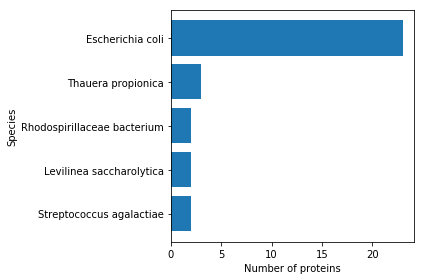

In [186]:
plt.barh(y,x)
plt.ylabel("Species")
plt.xlabel("Number of proteins")
plt.tight_layout()
plt.savefig("/Users/chilpert/Work/NOX_visu/species_most_abondant.svg",format="svg")
plt.savefig("/Users/chilpert/Work/NOX_visu/species_most_abondant.pdf",format="pdf")

#### Most abundant genus

In [187]:
x=[]
y=[]
for sp in ordered_prot_dic_genus: 
    x.append(len(ordered_prot_dic_genus[sp]['proteins']))
    y.append(sp) 
x=x[:6][::-1]
y=y[:6][::-1]

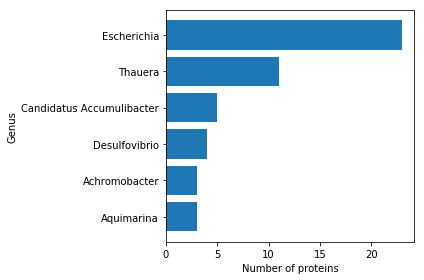

In [188]:
plt.barh(y,x)
plt.ylabel("Genus")
plt.xlabel("Number of proteins")
plt.tight_layout()
plt.savefig("/Users/chilpert/Work/NOX_visu/genus_most_abondant.svg",format="svg")
plt.savefig("/Users/chilpert/Work/NOX_visu/genus_most_abondant.pdf",format="pdf")

#### Distribution of number of proteins among species

In [189]:
dic_nb_proteins={}
for sp in ordered_prot_dic_species: 
    nb_proteins=len(ordered_prot_dic_species[sp]['proteins'])
    if nb_proteins not in dic_nb_proteins: 
        dic_nb_proteins[nb_proteins]=0 
    dic_nb_proteins[nb_proteins]+=1

In [190]:
x=list(dic_nb_proteins.keys())
y=list(dic_nb_proteins.values())

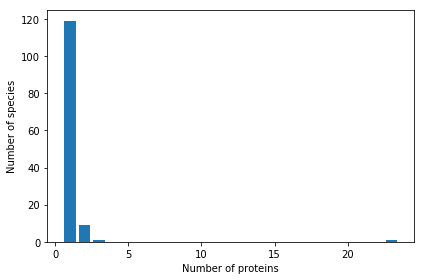

In [191]:
plt.bar(x,y)
plt.xlabel("Number of proteins")
plt.ylabel("Number of species")
plt.tight_layout()
plt.savefig("/Users/chilpert/Work/NOX_visu/distrib_nb_proteins_species.svg",format="svg")
plt.savefig("/Users/chilpert/Work/NOX_visu/distrib_nb_proteins_species.pdf",format="pdf")

### Unannotated fraction
**See later if we conserve**

In [192]:
o=open("/Volumes/arwen/mobi/group/NOX_CH/Domain/annotations.tsv","w")
o.write("#protein\tlength\tnb_annotated_residues\t%annotated\n")
list_percent_annotate=[]
list_core_annotate=[]
list_length=[]
for p in data : 
    length=data[p]['tmhmm']["Length"]
    annotated_residues=set()
    core_residues=set()
    list_length.append(length)
    for d in data[p]['hmmr']:
        for hit in data[p]['hmmr'][d][0].data: 
            if float(hit.iEvalue) < 1e-3 : 
                begin=int(hit.aliFrom)
                end=int(hit.aliTo)
                annotate=[i for i in range(begin,end+1)]
                annotated_residues.update(annotate)
                if d in core_domain: 
                    core_residues.update(annotate)
    percent_annotate=len(annotated_residues)/length*100
    percent_core_annotate=len(core_residues)/length*100
    list_percent_annotate.append(percent_annotate)
    list_core_annotate.append(percent_core_annotate)
    o.write(p+"\t"+str(length)+"\t"+str(len(annotated_residues))+"\t"+str(percent_annotate)+"\n")

NameError: name 'data' is not defined

In [63]:
import seaborn as sns

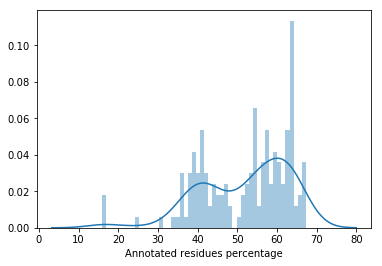

In [64]:
plot=sns.distplot(list_percent_annotate,bins=50,axlabel="Annotated residues percentage")
plot.figure.savefig("/Users/chilpert/Work/NOX_visu/annotated_part.pdf")

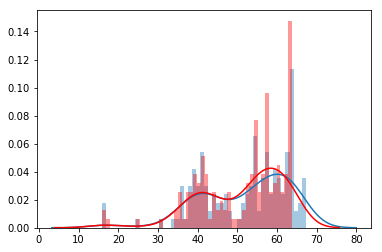

In [65]:
plot=sns.distplot(list_percent_annotate,bins=50)
sns.distplot(list_core_annotate,bins=50,color="red")
plot.figure.savefig("/Users/chilpert/Work/NOX_visu/annotated_part_withCore.pdf")

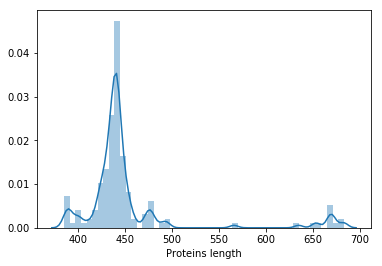

In [66]:
sns.distplot(list_length,axlabel="Proteins length").figure.savefig("/Users/chilpert/Work/NOX_visu/proteins_length_distrib.pdf")